Exercício 2:
Desenvolver um sistema fuzzy através do método de Mamdani em que se deseja avaliar a
inscrição de um determinado cliente para um pedido de financiamento imobiliário. Em
outras palavras, o sistema deve indicar se o cliente pode ser considerado potencialmente
apto para receber tal financiamento.

In [2]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=9b68fc6f6fc809b13d3ddf8bb1e780fc4720f09c88a0008864296dd8d0034cdd
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Potencialidade do Cliente: 5.938500146754985


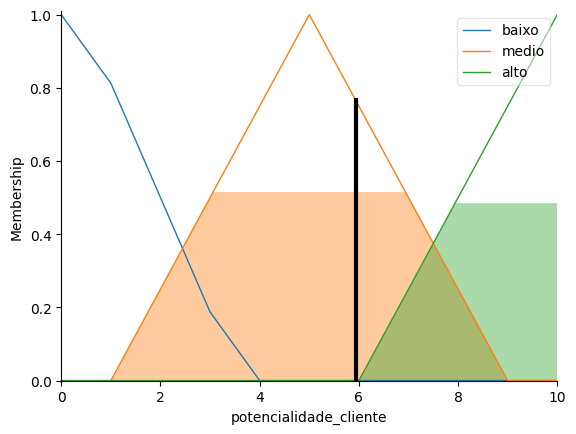

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# entrada
valor_patrimonial = ctrl.Antecedent(np.arange(0, 10001, 1), 'valor_patrimonial')
renda_mensal = ctrl.Antecedent(np.arange(1000, 10001, 1), 'renda_mensal')

# saída
potencialidade_cliente = ctrl.Consequent(np.arange(0, 11, 1), 'potencialidade_cliente')

# Funções para Valor Patrimonial
valor_patrimonial['baixo'] = fuzz.trimf(valor_patrimonial.universe, [-4000, 0, 4000])
valor_patrimonial['medio'] = fuzz.trimf(valor_patrimonial.universe, [1000, 5000, 9000])
valor_patrimonial['alto'] = fuzz.trimf(valor_patrimonial.universe, [6000, 10000, 14000])

# Funções de Renda Mensal
renda_mensal['baixa'] = fuzz.trimf(renda_mensal.universe, [-3200, 1000, 3400])
renda_mensal['media'] = fuzz.trimf(renda_mensal.universe, [1000, 3400, 6700])
renda_mensal['alta'] = fuzz.trimf(renda_mensal.universe, [3400, 6700, 10000])
renda_mensal['muito_alta'] = fuzz.trimf(renda_mensal.universe, [6700, 10000, 13300])

# Funções de Potencialidade do Cliente
potencialidade_cliente['baixo'] = fuzz.trapmf(potencialidade_cliente.universe, [-3.6, -0.4, 0.4, 3.6])
potencialidade_cliente['medio'] = fuzz.trimf(potencialidade_cliente.universe, [1, 5, 9])
potencialidade_cliente['alto'] = fuzz.trimf(potencialidade_cliente.universe, [6, 10, 14])

# Regras
regra1 = ctrl.Rule(valor_patrimonial['baixo'] & renda_mensal['baixa'], potencialidade_cliente['baixo'])
regra2 = ctrl.Rule(valor_patrimonial['baixo'] & renda_mensal['media'], potencialidade_cliente['baixo'])
regra3 = ctrl.Rule(valor_patrimonial['baixo'] & renda_mensal['alta'], potencialidade_cliente['medio'])
regra4 = ctrl.Rule(valor_patrimonial['baixo'] & renda_mensal['muito_alta'], potencialidade_cliente['alto'])
regra5 = ctrl.Rule(valor_patrimonial['medio'] & renda_mensal['baixa'], potencialidade_cliente['baixo'])
regra6 = ctrl.Rule(valor_patrimonial['medio'] & renda_mensal['media'], potencialidade_cliente['medio'])
regra7 = ctrl.Rule(valor_patrimonial['medio'] & renda_mensal['alta'], potencialidade_cliente['alto'])
regra8 = ctrl.Rule(valor_patrimonial['medio'] & renda_mensal['muito_alta'], potencialidade_cliente['alto'])
regra9 = ctrl.Rule(valor_patrimonial['alto'] & renda_mensal['baixa'], potencialidade_cliente['medio'])
regra10 = ctrl.Rule(valor_patrimonial['alto'] & renda_mensal['media'], potencialidade_cliente['medio'])
regra11 = ctrl.Rule(valor_patrimonial['alto'] & renda_mensal['alta'], potencialidade_cliente['alto'])
regra12 = ctrl.Rule(valor_patrimonial['alto'] & renda_mensal['muito_alta'], potencialidade_cliente['alto'])

# Criação do sistema de controle
sistema_controle = ctrl.ControlSystem(
    [regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10, regra11, regra12])
potencialidade_cliente_simulacao = ctrl.ControlSystemSimulation(sistema_controle)

# valores
potencialidade_cliente_simulacao.input['valor_patrimonial'] = 6000
potencialidade_cliente_simulacao.input['renda_mensal'] = 5000
potencialidade_cliente_simulacao.compute()

print("Potencialidade do Cliente:", potencialidade_cliente_simulacao.output['potencialidade_cliente'])
potencialidade_cliente.view(sim=potencialidade_cliente_simulacao)

Exercício 3: Desenvolver um sistema de monitoramento de um tanque baseado em lógica fuzzy. O
objetivo dele é detectar e isolar 3 possíveis falhas (ver mais abaixo). A figura abaixo
mostra o referido sistema.

Exercício 4: Desenvolver um sistema fuzzy (método de Mamdani) que determine o grau de risco de um ataque cardíaco, usando as variáveis dieta, exercício e risco.

O risco de um ataque cardíaco é: 50.00000000000001


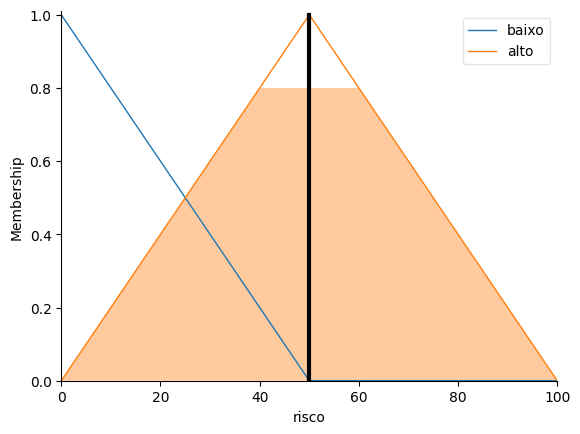

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#entrada
dieta = ctrl.Antecedent(np.arange(0, 5001, 1), 'dieta')
exercicio = ctrl.Antecedent(np.arange(0, 2001, 1), 'exercicio')

#saída
risco = ctrl.Consequent(np.arange(0, 101, 1), 'risco')

# Funções Dieta
dieta['baixa'] = fuzz.trimf(dieta.universe, [0, 0, 2500])
dieta['alta'] = fuzz.trimf(dieta.universe, [0, 2500, 5000])

# Funções Exercício
exercicio['baixo'] = fuzz.trimf(exercicio.universe, [0, 0, 1000])
exercicio['alto'] = fuzz.trimf(exercicio.universe, [0, 1000, 2000])

# Funções Risco
risco['baixo'] = fuzz.trimf(risco.universe, [0, 0, 50])
risco['alto'] = fuzz.trimf(risco.universe, [0, 50, 100])

# Regras
regra1 = ctrl.Rule(dieta['baixa'] & exercicio['alto'], risco['baixo'])
regra2 = ctrl.Rule(dieta['alta'] | exercicio['baixo'], risco['alto'])


sistema_controle = ctrl.ControlSystem([regra1, regra2])
sistema_simulacao = ctrl.ControlSystemSimulation(sistema_controle)

# valores
sistema_simulacao.input['dieta'] = 3000
sistema_simulacao.input['exercicio'] = 1000

# resultado
sistema_simulacao.compute()
risco_resultado = sistema_simulacao.output['risco']
print("O risco de um ataque cardíaco é:", risco_resultado)

# Visualização
risco.view(sim=sistema_simulacao)



Exercício 5:Desenvolva um sistema de inferência fuzzy (Mamdani) com duas variáveis de entrada que representam o número de anos de educação e o número de anos de experiência, e uma variável de saída que representa o salário.

O salário correspondente é: 164.99993555394468


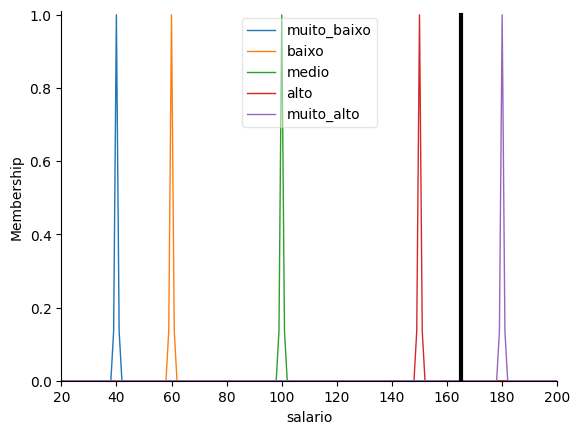

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# entrada
educacao = ctrl.Antecedent(np.arange(0, 16, 0.1), 'educacao')
experiencia = ctrl.Antecedent(np.arange(0, 26, 0.1), 'experiencia')

# saída
salario = ctrl.Consequent(np.arange(20, 201, 1), 'salario')

# Funções Educação
educacao['baixa'] = fuzz.gaussmf(educacao.universe, 2, 0.5)
educacao['media'] = fuzz.gaussmf(educacao.universe, 7.5, 0.5)
educacao['alta'] = fuzz.gaussmf(educacao.universe, 12.5, 0.5)

# Funções Experiência
experiencia['baixa'] = fuzz.gaussmf(experiencia.universe, 5, 0.5)
experiencia['media'] = fuzz.gaussmf(experiencia.universe, 15, 0.5)
experiencia['alta'] = fuzz.gaussmf(experiencia.universe, 20, 0.5)

# Funções Salário
salario['muito_baixo'] = fuzz.gaussmf(salario.universe, 40, 0.5)
salario['baixo'] = fuzz.gaussmf(salario.universe, 60, 0.5)
salario['medio'] = fuzz.gaussmf(salario.universe, 100, 0.5)
salario['alto'] = fuzz.gaussmf(salario.universe, 150, 0.5)
salario['muito_alto'] = fuzz.gaussmf(salario.universe, 180, 0.5)

# Regras
regra1 = ctrl.Rule(educacao['baixa'] & experiencia['baixa'], salario['muito_baixo'])
regra2 = ctrl.Rule(educacao['baixa'] & experiencia['media'], salario['baixo'])
regra3 = ctrl.Rule(educacao['baixa'] & experiencia['alta'], salario['medio'])
regra4 = ctrl.Rule(educacao['media'] & experiencia['baixa'], salario['baixo'])
regra5 = ctrl.Rule(educacao['media'] & experiencia['media'], salario['medio'])
regra6 = ctrl.Rule(educacao['media'] & experiencia['alta'], salario['alto'])
regra7 = ctrl.Rule(educacao['alta'] & experiencia['baixa'], salario['medio'])
regra8 = ctrl.Rule(educacao['alta'] & experiencia['media'], salario['alto'])
regra9 = ctrl.Rule(educacao['alta'] & experiencia['alta'], salario['muito_alto'])


sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])
sistema_simulacao = ctrl.ControlSystemSimulation(sistema_controle)
sistema_simulacao.input['educacao'] = 10
sistema_simulacao.input['experiencia'] = 18.6

# resultado
sistema_simulacao.compute()
salario_resultado = sistema_simulacao.output['salario']
print("O salário correspondente é:", salario_resultado)

# Visualização
salario.view(sim=sistema_simulacao)
